In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 35})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020", "Neutrons_Sliced")

fileinprefix = "SlicedDetections*RestrictedCylinder*.csv"
df_ar41_ROIcylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.columns[:-1]]
print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 1 files wt prefix:
SlicedDetections*RestrictedCylinder*.csv

[Info] Loaded data in 32.398 seconds


In [4]:
dfgbyevent = df_ar41_ROIcylinder.groupby("eventnumber").sum()

In [5]:
nevents_detected_ROIcylinder = len(dfgbyevent[dfgbyevent.pedetected>0])
nevents_detected_50 = len(dfgbyevent[dfgbyevent.pedetected>50])

In [6]:
print(f'Nr Detected Events: {nevents_detected_ROIcylinder}')
print(f'Nr Detected Events >50PE: {nevents_detected_50} ({nevents_detected_50/nevents_detected_ROIcylinder}%)')

Nr Detected Events: 15108
Nr Detected Events >50PE: 1139 (0.07539052157797194%)


In [13]:
dfcuttime = df_ar41_ROIcylinder[df_ar41_ROIcylinder.time<100000]

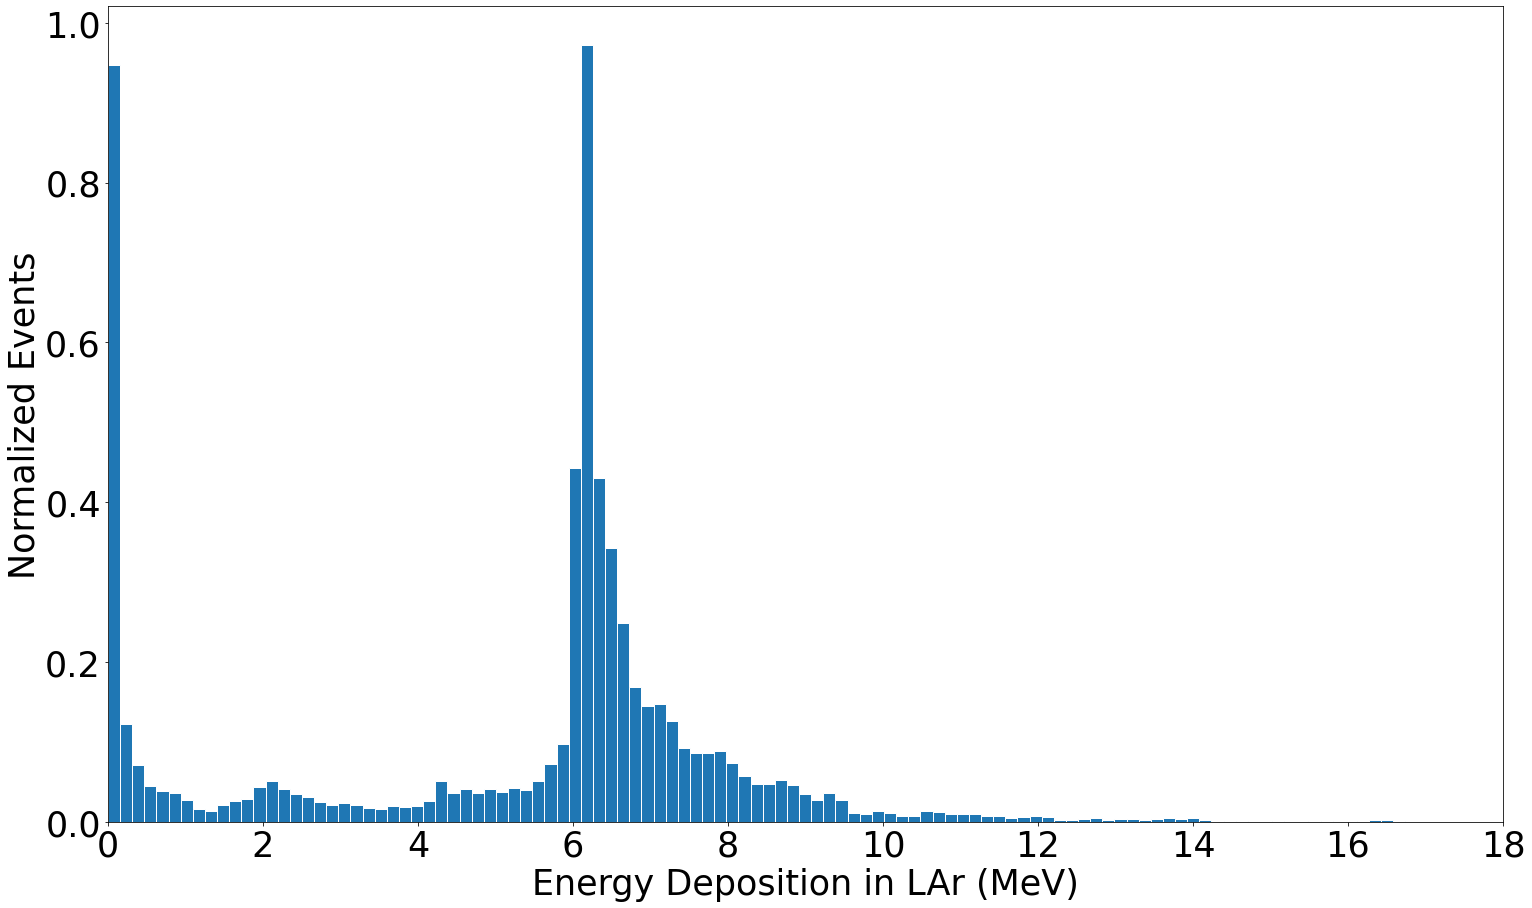

In [32]:
energy = dfcuttime.groupby("eventnumber").energydeposition.sum()
plt.hist(energy[energy>0]/1000, bins=150, density=True, edgecolor='w')
plt.xticks(range(0, 20, 2))
plt.xlabel("Energy Deposition in LAr (MeV)")
plt.ylabel("Normalized Events")
plt.xlim(0, 18)
plt.show()

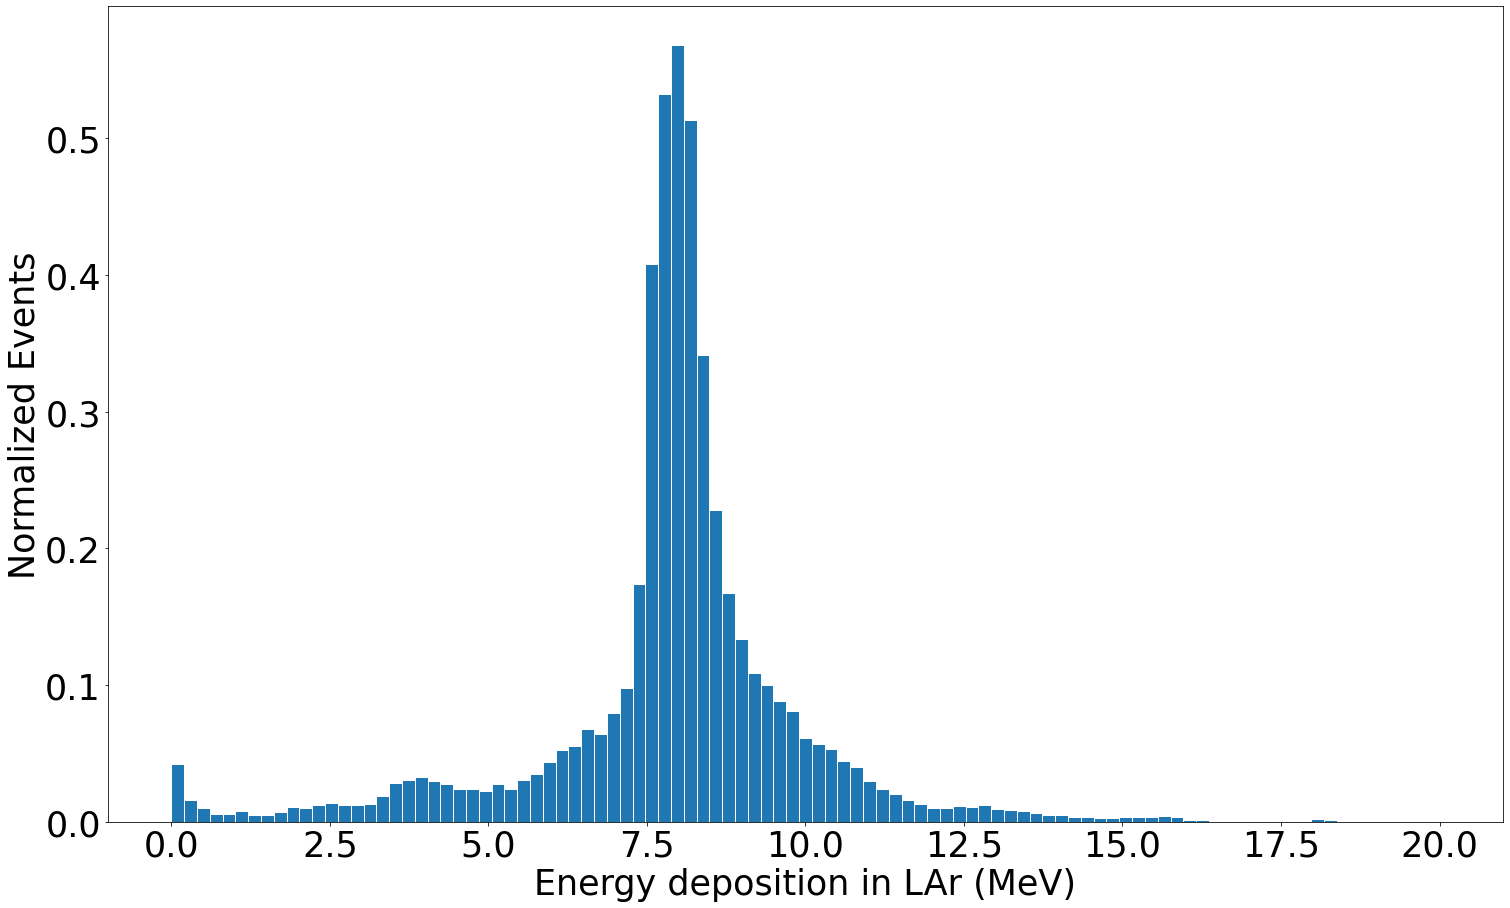

In [31]:
bins = np.linspace(0, 20, 100)
plt.hist(dfgbyevent.energydeposition/1000, bins=bins, density=True, edgecolor='w')
plt.xlabel("Energy deposition in LAr (MeV)")
plt.ylabel("Normalized Events")
plt.show()

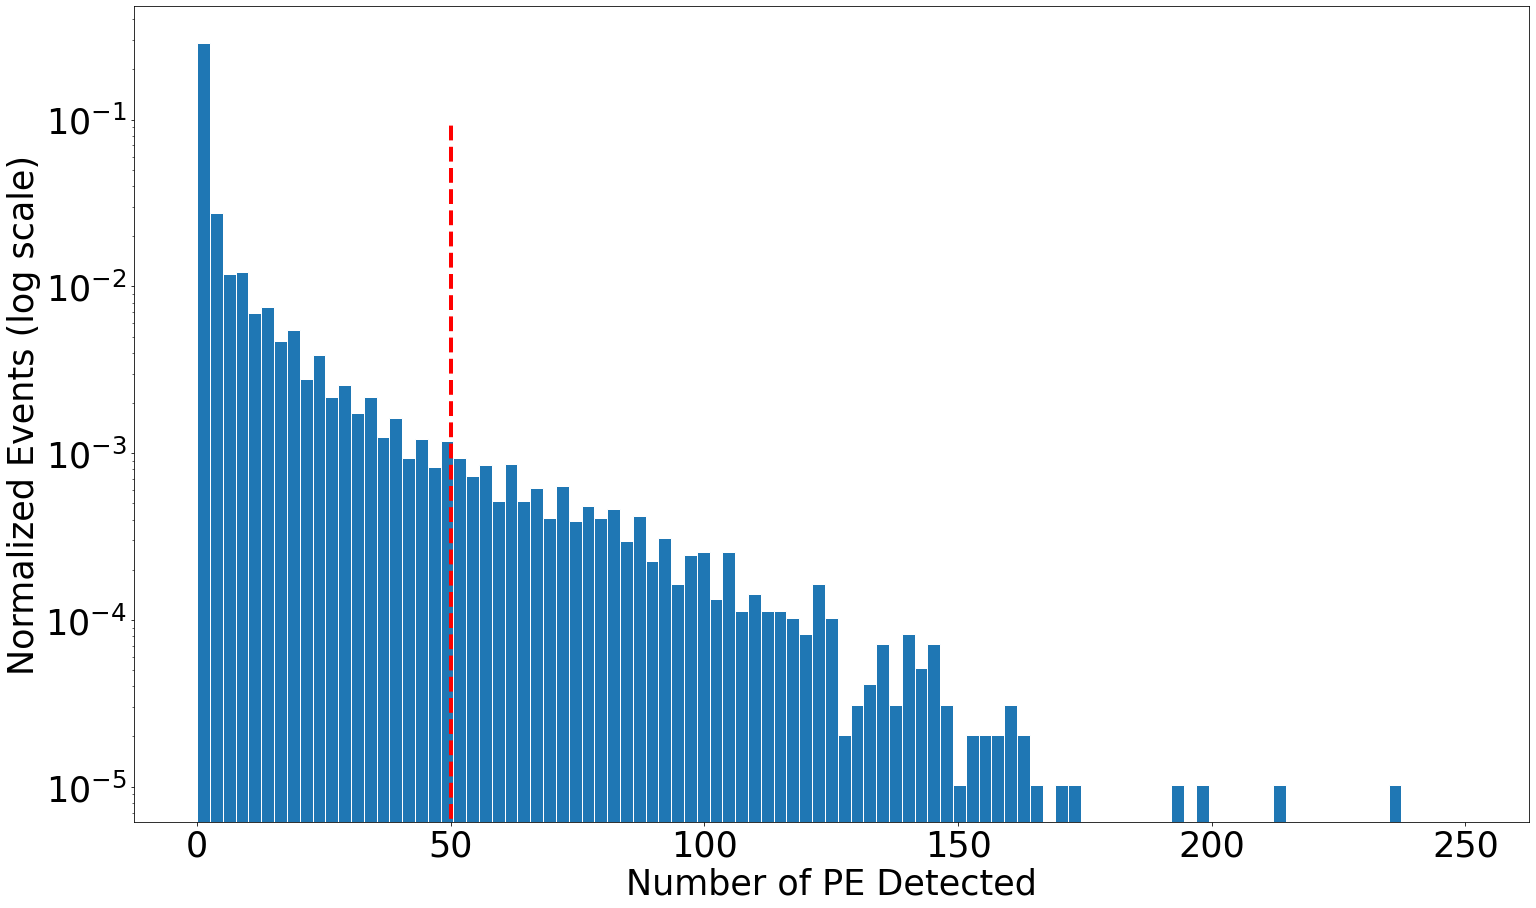

In [32]:
bins = np.linspace(0, 250, 100)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").pedetected.sum(), bins=bins, density=True, edgecolor='w')
plt.xlabel("Number of PE Detected")
plt.ylabel("Normalized Events (log scale)")
plt.yscale("log")
plt.vlines(50, 0, 0.1, color="r", linewidth=4, linestyle="dashed")
plt.show()

In [20]:
len(df_ar41_ROIcylinder.groupby("eventnumber").pedetected.sum()>50)

38549

In [12]:
len(dfgbyevent[dfgbyevent.pedetected>=50]) / len(dfgbyevent[dfgbyevent.pedetected>0])

0.07803812549642573

In [33]:
# Select 1st step of Ar41 particles (production step) for each event
df_onlyar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
# compute the radial distance of the production point
radius_onlyar41_ROIcylinder = (df_onlyar41_ROIcylinder.x**2 + df_onlyar41_ROIcylinder.y**2 + df_onlyar41_ROIcylinder.z**2)**.5

In [34]:
# Select 1st step of Ar41 particles (production step) for each event
df_onlyNe_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
# compute the radial distance of the production point
radius_onlyNe_ROIcylinder = (df_onlyNe_ROIcylinder.x**2 + df_onlyNe_ROIcylinder.y**2 + df_onlyNe_ROIcylinder.z**2)**.5

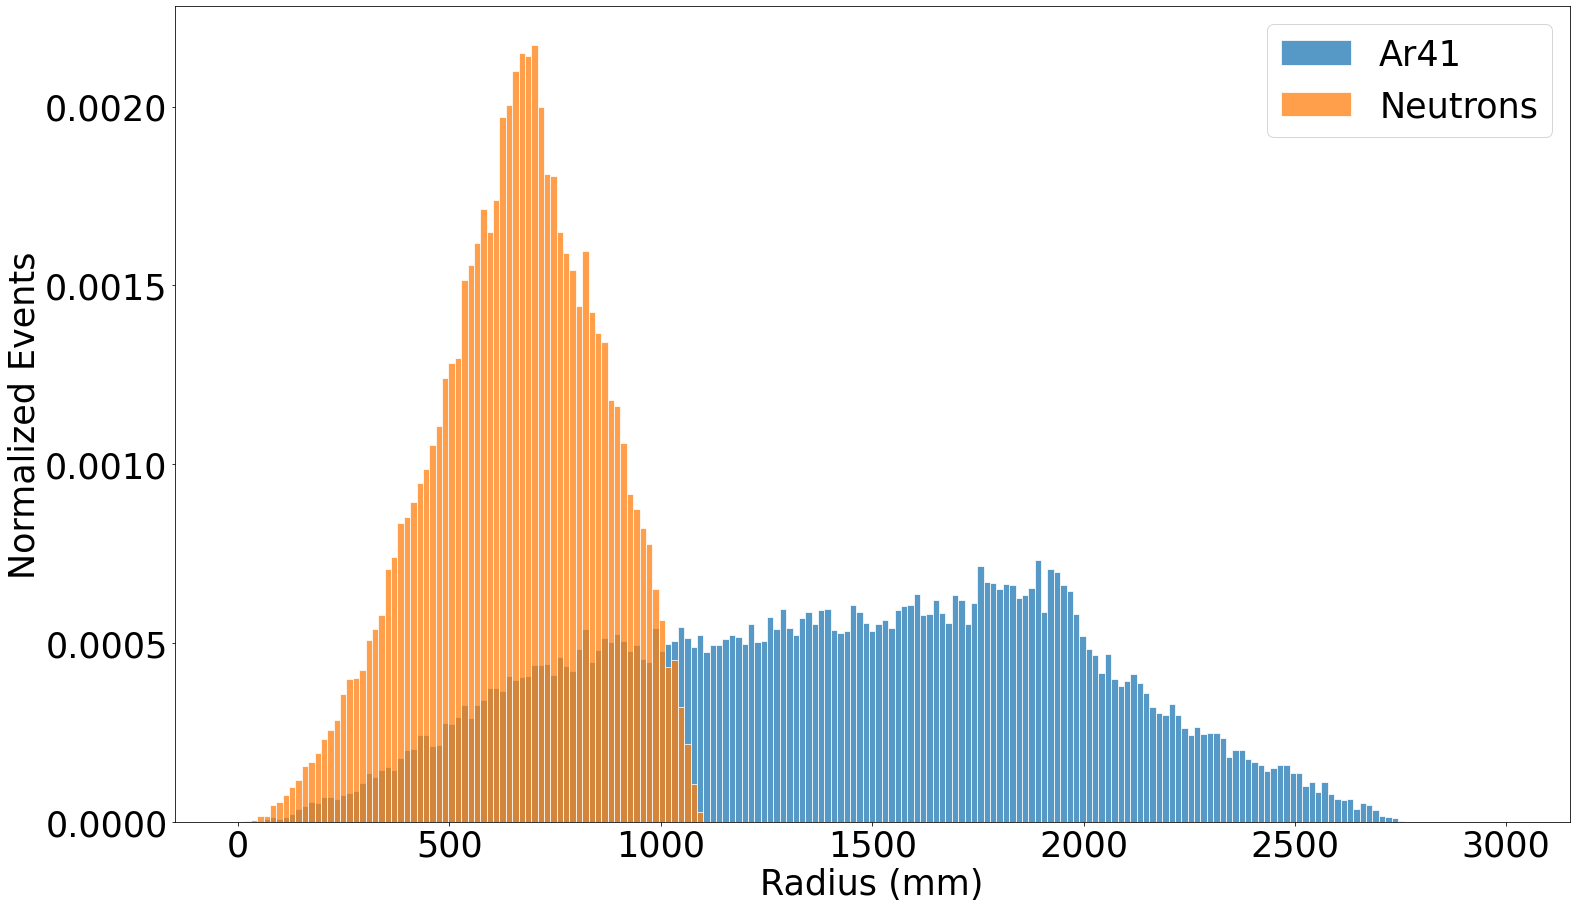

In [41]:
bins = np.linspace(0, 3000, 200)
alpha=.75

plt.hist(radius_onlyar41_ROIcylinder, bins=bins, label="Ar41", alpha=alpha, density=True, edgecolor="w")
plt.hist(radius_onlyNe_ROIcylinder, bins=bins, label="Neutrons", alpha=alpha, density=True, edgecolor="w")
plt.legend()
plt.xlabel("Radius (mm)")
plt.ylabel("Normalized Events")
plt.show()